<a href="https://colab.research.google.com/github/gorantlasuhas/git_new/blob/main/Mllab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/CC_GENERAL.csv')

# Select only the numeric columns for clustering
numeric_data = data.select_dtypes(include=[np.number])

# Handle missing values
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Normalize the data
data_norm = (numeric_data - numeric_data.mean()) / numeric_data.std()

# Calculate the pairwise distances between the data points
distances = pdist(data_norm)

# Calculate the average distance between all pairs of points
avg_distance = np.nanmean(distances)  # Use np.nanmean to handle NaN values

# Check if avg_distance is a valid float
if np.isnan(avg_distance):
    avg_distance = 0.0  # Set to 0 if NaN

# Perform agglomerative clustering using single linkage
model_single = AgglomerativeClustering(n_clusters=None, linkage='single', distance_threshold=avg_distance)
model_single.fit(data_norm)
labels_single = model_single.labels_

# Perform agglomerative clustering using complete linkage
model_complete = AgglomerativeClustering(n_clusters=None, linkage='complete', distance_threshold=avg_distance)
model_complete.fit(data_norm)
labels_complete = model_complete.labels_

# Perform agglomerative clustering using ward linkage
model_ward = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=avg_distance)
model_ward.fit(data_norm)
labels_ward = model_ward.labels_

# Calculate the cophenetic correlation coefficient for each model
Z_single = linkage(data_norm, method='single')
c_single, coph_dists_single = cophenet(Z_single, distances)

Z_complete = linkage(data_norm, method='complete')
c_complete, coph_dists_complete = cophenet(Z_complete, distances)

Z_ward = linkage(data_norm, method='ward')
c_ward, coph_dists_ward = cophenet(Z_ward, distances)

# Determine the number of clusters for each model
num_clusters_single = len(set(labels_single))
num_clusters_complete = len(set(labels_complete))
num_clusters_ward = len(set(labels_ward))

# Print the results
print("Single linkage:")
print("Number of clusters:", num_clusters_single)
print("Cophenetic correlation coefficient:", c_single)
print()
print("Complete linkage:")
print("Number of clusters:", num_clusters_complete)
print("Cophenetic correlation coefficient:", c_complete)
print()
print("Ward linkage:")
print("Number of clusters:", num_clusters_ward)
print("Cophenetic correlation coefficient:", c_ward)

Single linkage:
Number of clusters: 44
Cophenetic correlation coefficient: 0.8447527769163788

Complete linkage:
Number of clusters: 259
Cophenetic correlation coefficient: 0.6859732954011413

Ward linkage:
Number of clusters: 564
Cophenetic correlation coefficient: 0.330727947074149


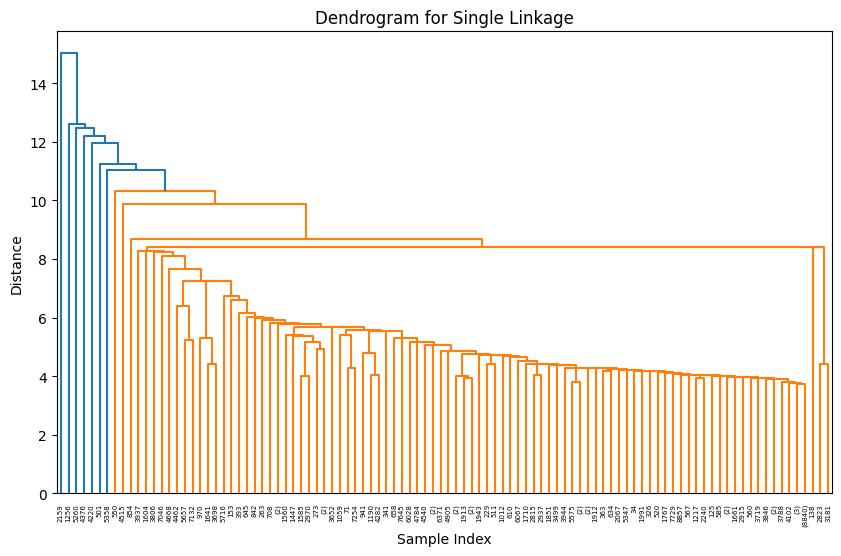

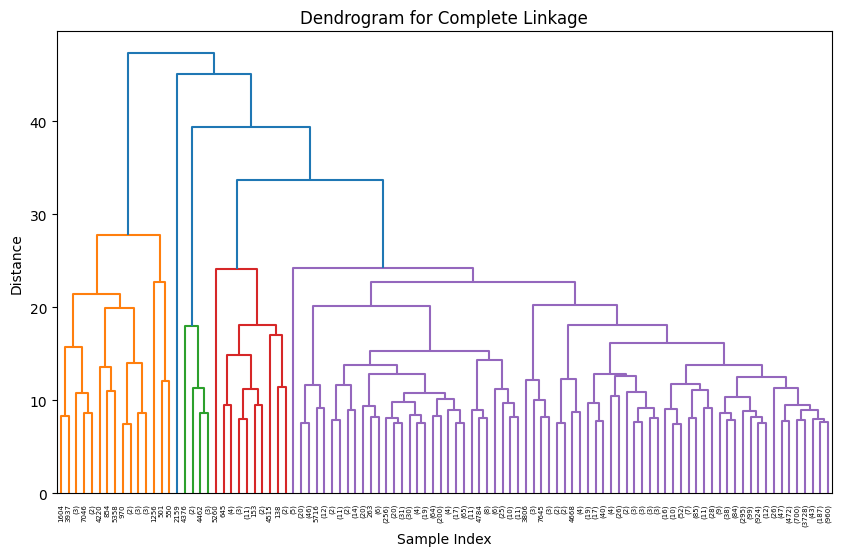

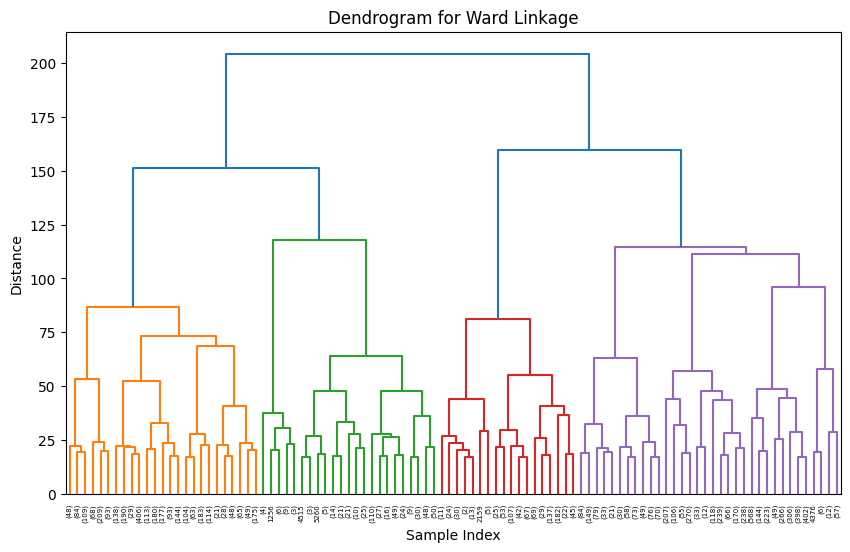

In [14]:
# Plot dendrogram for single linkage
plt.figure(figsize=(10, 6))
dendrogram(Z_single, truncate_mode='lastp', p=100)
plt.title('Dendrogram for Single Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Plot dendrogram for complete linkage
plt.figure(figsize=(10, 6))
dendrogram(Z_complete, truncate_mode='lastp', p=100)
plt.title('Dendrogram for Complete Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Plot dendrogram for ward linkage
plt.figure(figsize=(10, 6))
dendrogram(Z_ward, truncate_mode='lastp', p=100)
plt.title('Dendrogram for Ward Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()